In [20]:
import tensorflow
import tensorflow as tf
import pandas as pd 
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt
import time
import sys
import copy 

%matplotlib inline


class BackPropagation:
    def __init__(self, iteraciones, LR, neurons, window_size, prediction_size, train_size):
        iterations = iteraciones
        LR = LR
        neurons = neurons
        window_size = window_size
        prediction_size = prediction_size
        train_size = train_size
        #########################################################
        priv_dat = pd.read_excel("privateProdAllYears.xls", one_hot=True)
        public_dat = pd.read_excel("publicProdAllYears.xls")
        data = (priv_dat["Average"])
        data = np.array(data)/np.max(data)
        data_size = (data.size)
        validate_size = data_size - train_size
        #########################################################
        a_0 = tf.placeholder(tf.float32, [1, window_size])
        y = tf.placeholder(tf.float32, [1, prediction_size])
        w_1 = tf.Variable(tf.truncated_normal([window_size, neurons]))
        w_2 = tf.Variable(tf.truncated_normal([neurons, prediction_size]))
        ##########################################################
        def sigma(x):
            return tf.div(tf.constant(1.0),
                          tf.add(tf.constant(1.0), tf.exp(tf.negative(x))))

        def sigmaprime(x):
            return tf.multiply(sigma(x), tf.subtract(tf.constant(1.0), sigma(x)))

        ##############################################################
        z_1 = tf.matmul(a_0, w_1)
        a_1 = sigma(z_1)
        z_2 = tf.matmul(a_1, w_2)
        a_2 = sigma(z_2)
        diff = tf.subtract(a_2, y)
        ###############################################################
        d_z_2 = tf.multiply(diff, sigmaprime(z_2))
        d_b_2 = d_z_2
        d_w_2 = tf.matmul(tf.transpose(a_1), d_z_2)
        d_a_1 = tf.matmul(d_z_2, tf.transpose(w_2))
        d_z_1 = tf.multiply(d_a_1, sigmaprime(z_1))
        d_b_1 = d_z_1
        d_w_1 = tf.matmul(tf.transpose(a_0), d_z_1)
        ###############################################################
        eta = tf.constant(LR)
        cost = tf.multiply(diff, diff)
        cost = tf.sqrt(cost)
        #step = tf.train.GradientDescentOptimizer(0.1).minimize(cost)
        step = [
            tf.assign(w_1,
                    tf.subtract(w_1, tf.multiply(eta, d_w_1)))
          , tf.assign(w_2,
                    tf.subtract(w_2, tf.multiply(eta, d_w_2)))
        ]
        sess = tf.InteractiveSession()
        sess.run(tf.global_variables_initializer())
        df = pd.DataFrame(columns=['error'])
        ##############################################################################################
        for i in range(iterations):
            error_final = 0
            for j in range ((train_size - prediction_size) - window_size):
                batch_xs = (data[j: j+window_size])
                batch_ys = (data[j+window_size ])
                batch_xs = np.reshape(batch_xs,(1,window_size))
                batch_ys = np.reshape(batch_ys,(1,1))
                sess.run([step,cost], feed_dict = {a_0: batch_xs, y : batch_ys})
            for j in range (train_size,((data_size - prediction_size) - window_size)):
                batch_xs = (data[j: j+ window_size])
                batch_ys = (data[j + window_size])
                batch_xs = np.reshape(batch_xs,(1,window_size))
                batch_ys = np.reshape(batch_ys,(1,1))
                error = sess.run([cost], feed_dict = {a_0: batch_xs, y : batch_ys})
                error_final += error[0][0][0]
            df = df.append({'error':error_final/validate_size}, ignore_index=True)
        self.resultado = df
        self.final_result = error_final


In [11]:
start_time = time.time()
prueba = BackPropagation (200,0.1,10,10,1,120)
print("--- %s seconds ---" % (time.time() - start_time))


--- 14.16408920288086 seconds ---


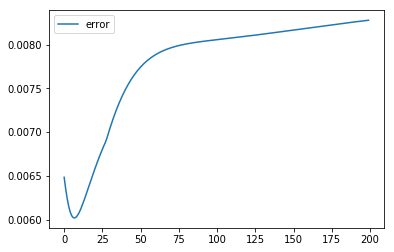

In [12]:
df = prueba.resultado
df.plot()